In [121]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

In [122]:
from keras.datasets import mnist
(x_train_image, y_train_label),\
(x_test_image, y_test_label)=mnist.load_data()

In [123]:
x_Train=x_train_image.reshape(60000, 784).astype('float32')
x_Test=x_test_image.reshape(10000, 784).astype('float32')

In [124]:
x_Train_normalize =x_Train/255
x_Test_normalise =x_Test/255


In [125]:
y_TrainOneHot =np_utils.to_categorical(y_train_label)
y_TestOneHot =np_utils.to_categorical(y_test_label)

In [126]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [127]:
model =Sequential()

In [128]:
model.add(Dense(units=1000, input_dim=784,
                kernel_initializer='normal',
                activation='relu'))

In [129]:
model.add(Dropout(0.5))
model.add(Dense(units=1000,
                kernel_initializer='normal',
                activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=10,kernel_initializer='normal',activation='softmax'))

In [130]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 1000)              785000    
_________________________________________________________________
dropout_10 (Dropout)         (None, 1000)              0         
_________________________________________________________________
dense_25 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dropout_11 (Dropout)         (None, 1000)              0         
_________________________________________________________________
dense_26 (Dense)             (None, 10)                10010     
Total params: 1,796,010
Trainable params: 1,796,010
Non-trainable params: 0
_________________________________________________________________
None


In [131]:
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [132]:
train_history =model.fit(x=x_Train_normalize, y=y_TrainOneHot, validation_split=0.2,epochs=10,batch_size=200,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
13s - loss: 0.3636 - acc: 0.8860 - val_loss: 0.1318 - val_acc: 0.9609
Epoch 2/10
13s - loss: 0.1585 - acc: 0.9527 - val_loss: 0.0988 - val_acc: 0.9708
Epoch 3/10
13s - loss: 0.1179 - acc: 0.9634 - val_loss: 0.0889 - val_acc: 0.9733
Epoch 4/10
13s - loss: 0.0969 - acc: 0.9701 - val_loss: 0.0849 - val_acc: 0.9748
Epoch 5/10
13s - loss: 0.0866 - acc: 0.9727 - val_loss: 0.0760 - val_acc: 0.9782
Epoch 6/10
13s - loss: 0.0755 - acc: 0.9760 - val_loss: 0.0773 - val_acc: 0.9766
Epoch 7/10
13s - loss: 0.0630 - acc: 0.9800 - val_loss: 0.0718 - val_acc: 0.9778
Epoch 8/10
14s - loss: 0.0599 - acc: 0.9810 - val_loss: 0.0825 - val_acc: 0.9765
Epoch 9/10
13s - loss: 0.0564 - acc: 0.9817 - val_loss: 0.0685 - val_acc: 0.9795
Epoch 10/10
13s - loss: 0.0543 - acc: 0.9829 - val_loss: 0.0694 - val_acc: 0.9793


In [69]:
%matplotlib inline
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show

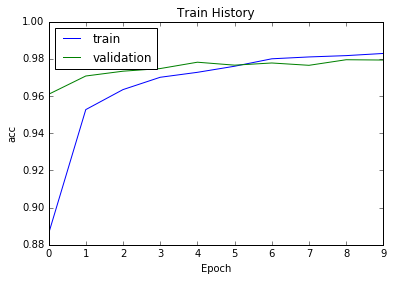

In [133]:
show_train_history(train_history,'acc','val_acc')

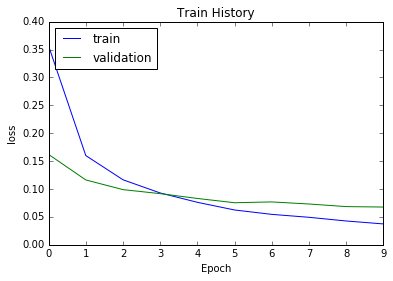

In [103]:
show_train_history(train_history,'loss','val_loss')

In [71]:
scores = model.evaluate(x_Test_normalise, y_TestOneHot)
print()
print('accuracy=', scores[1])

 9248/10000 [==========================>...] - ETA: 0s
accuracy= 0.9798


In [37]:
prediction=model.predict_classes(x_Test)

 9056/10000 [==========================>...] - ETA: 0s

In [38]:
prediction

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

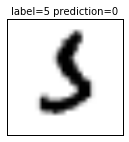

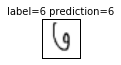

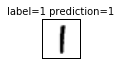

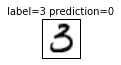

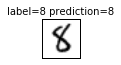

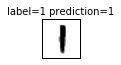

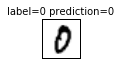

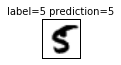

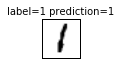

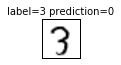

In [49]:
plot_images_labels_prediction(x_test_image, y_test_label, prediction, idx=340)

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images, labels, prediction, idx, num=10):
    fig =plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25
    for i in range(0, num):
            ax=plt.subplot(5,5, 1+i)
            ax.imshow(images[idx], cmap='binary')
            title= "label=" +str(labels[idx])+" prediction=" +str(prediction[idx])
            
            
            ax.set_title(title,fontsize=10)
            ax.set_xticks([]);ax.set_yticks([])
            idx+=1
            plt.show()

In [50]:
import pandas as pd
pd.crosstab(y_test_label,prediction,rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,947,0,6,1,17,0,8,1,0,0
1,2,1119,5,0,0,0,8,0,1,0
2,1,0,1019,0,4,0,3,4,1,0
3,890,0,36,6,1,2,0,7,68,0
4,0,5,5,0,956,0,10,5,1,0
5,33,0,8,4,3,821,15,4,4,0
6,7,2,4,0,12,2,931,0,0,0
7,3,10,27,0,1,0,0,985,2,0
8,5,4,40,0,3,6,41,8,867,0


In [51]:
df=pd.DataFrame({'label':y_test_label, 'predict':prediction})
df[:2]

,label,predict
0,7,7
1,2,2


In [52]:
df[(df.label==5)&(df.predict==3)]

,label,predict
6598,5,3
7511,5,3
9777,5,3
9982,5,3


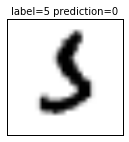

In [53]:
plot_images_labels_prediction(x_test_image, y_test_label, prediction, idx=340, num=1)